In [2]:
import pandas as pd 
import numpy as np
df = pd.read_csv("C:/o2d modelling/driver_model_data.csv")

In [3]:
df.shape

(17522784, 24)

In [4]:
df1=df
df1.shape
df1.columns
df1.approve_date.unique()
df.shape
df2 = df1[['service_profile','tpl_flag','shared_lanes_flag','o2d','d0_dispatch','d0_connection','d1_connection',
          'nfbf_dispatch_service_tier','d0_phin','d0_rts','cb_flag','dg_flag','lockin_flag','lzn','lpe_tier', 'air_flag','dh_spillage_o2d']]
df2.isna().sum()




service_profile                     0
tpl_flag                            0
shared_lanes_flag                 151
o2d                                 0
d0_dispatch                         0
d0_connection                       0
d1_connection                       0
nfbf_dispatch_service_tier    7149981
d0_phin                             0
d0_rts                              0
cb_flag                       1819469
dg_flag                       1558860
lockin_flag                     98215
lzn                            211042
lpe_tier                            0
air_flag                            0
dh_spillage_o2d                     0
dtype: int64

In [5]:
df2.isna().sum()


service_profile                     0
tpl_flag                            0
shared_lanes_flag                 151
o2d                                 0
d0_dispatch                         0
d0_connection                       0
d1_connection                       0
nfbf_dispatch_service_tier    7149981
d0_phin                             0
d0_rts                              0
cb_flag                       1819469
dg_flag                       1558860
lockin_flag                     98215
lzn                            211042
lpe_tier                            0
air_flag                            0
dh_spillage_o2d                     0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001EF9D040550>]],
      dtype=object)

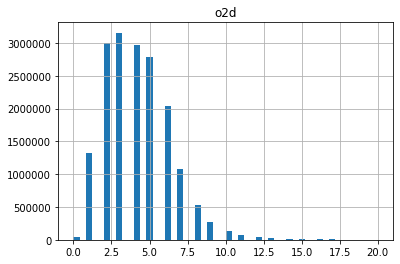

In [7]:
import matplotlib.pyplot as plot
import numpy as np
df2.shape
is_o2d = df2['o2d']<=20
df_3 = df2[is_o2d]
df_3.columns
df_3.hist(column = 'o2d',bins =50, xlabelsize = 10, ylabelsize= None)

In [ ]:
df2['service_profile'] = df2['service_profile'].astype(str)
df2['nfbf_dispatch_service_tier'] = df2['nfbf_dispatch_service_tier'].astype(str)
df2["service_profile_nfbf_tier"] = df2["service_profile"] + df2["nfbf_dispatch_service_tier"]
df2['service_profile_nfbf_tier'].unique()
df3 = df2[df2['lockin_flag'].notnull()]
df3.shape
df4 = df3[df3['lzn'].notnull()]
df5 = df4[df4['shared_lanes_flag'].notnull()]

df6 = df5[['service_profile','tpl_flag','shared_lanes_flag','o2d','d0_dispatch','d0_connection','d1_connection',
          'nfbf_dispatch_service_tier','d0_phin','d0_rts','lockin_flag','lzn','lpe_tier', 'air_flag','dh_spillage_o2d','service_profile_nfbf_tier']]
df6.isna().sum()
df_new = df6[0:100000]
df_new.to_csv('C:/o2d modelling/clean_data_check_1.csv')

In [9]:
df6.shape

(17214810, 16)

In [10]:
df6.columns

Index(['service_profile', 'tpl_flag', 'shared_lanes_flag', 'o2d',
       'd0_dispatch', 'd0_connection', 'd1_connection',
       'nfbf_dispatch_service_tier', 'd0_phin', 'd0_rts', 'lockin_flag', 'lzn',
       'lpe_tier', 'air_flag', 'dh_spillage_o2d', 'service_profile_nfbf_tier'],
      dtype='object')

In [12]:
df6['nfbf_dispatch_service_tier'].unique()
df6 = df6.drop(['nfbf_dispatch_service_tier'], axis = 1)
df6.shape
df6.o2d.unique()
is_o2d = df6['o2d']<=20
df6 = df6[is_o2d]
df_2 = pd.get_dummies(df6, columns=['service_profile', 'shared_lanes_flag','service_profile_nfbf_tier','lockin_flag','lzn','lpe_tier','air_flag'])
df_2.shape

(17205182, 30)

In [14]:
conditions = [
    (df_2['lzn_L1'] == 1) | (df_2['lzn_L2'] == 1)]
choices = [1]
df_2['L'] = np.select(conditions, choices, default= 0 )

conditions = [
    (df_2['lzn_Z1'] == 1) | (df_2['lzn_Z2'] == 1)]
choices = [1]
df_2['Z'] = np.select(conditions, choices, default= 0 )

conditions = [
    (df_2['lzn_N1'] == 1) | (df_2['lzn_N2'] == 1)]
choices = [1]
df_2['N'] = np.select(conditions, choices, default= 0 )


df_2 = df_2.drop(['lzn_L1','lzn_L2','lzn_Z1','lzn_Z2','lzn_N1','lzn_N2'], axis = 1)
df_2 = df_2.drop(['service_profile_NON_FBF','shared_lanes_flag_independent','service_profile_nfbf_tier_FBFnan','service_profile_nfbf_tier_NON_FBFREGULAR','lockin_flag_activateEligible','lockin_flag_inactive','lpe_tier_REGULAR','air_flag_Surface','N'],axis =1)

In [72]:
df_2['randNumCol'] = np.random.randint(1,10000, size=len(df_2))
df_2['randNumCol'].unique()
df_3=df_2.groupby('randNumCol').agg('mean')
df_3['o2d'] = np.log(df_3['o2d'])
df_3.shape

(9999, 18)

In [73]:
#df_3['o2d'] = np.log(df_3['o2d'])
df_3.o2d
df_new = df_3[0:100000]
df_new.to_csv('C:/o2d modelling/clean_data_check_4.csv')

PermissionError: [Errno 13] Permission denied: 'C:/o2d modelling/clean_data_check_4.csv'

In [ ]:
df_3.columns

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F06CAA79E8>]],
      dtype=object)

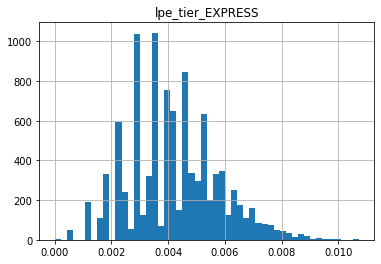

In [51]:
# eda on data 
#import matplotlib.pyplot as plot
#import numpy as np
#is_o2d = df_3['o2d']<=20
#df_3 = df_3[is_o2d]
#df_3.columns
df_3.hist(column = 'lpe_tier_EXPRESS',bins =50, xlabelsize = 10, ylabelsize= None)

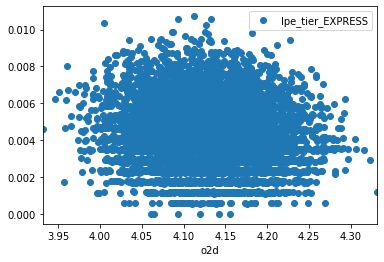

In [53]:
df_3.plot(x='o2d', y='lpe_tier_EXPRESS', style='o')


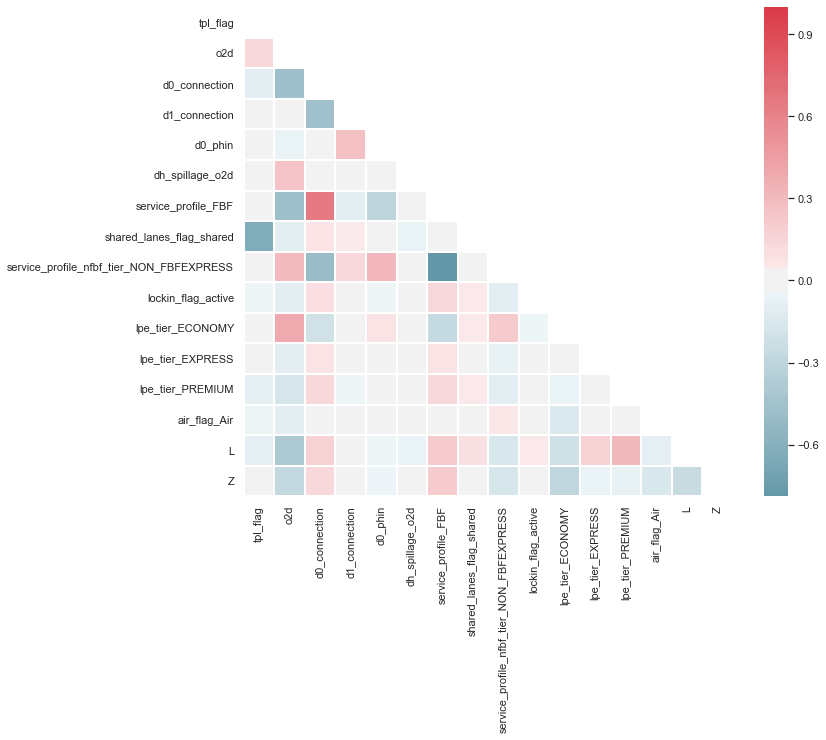

In [76]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")
# Compute the correlation matrix
corr = df_check.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 1})


In [75]:
df_check = df_3.drop(['d0_dispatch'], axis = 1)
df_check = df_check.drop(['d0_rts'], axis = 1)

train = df_check

from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split

y = train.o2d
train1=train
train1 = train1.drop(['o2d'], axis = 1)

train1.shape
y.unique()

array([1.43574264, 1.42226997, 1.41184678, ..., 1.4145582 , 1.41954009,
       1.42391219])

(7999, 15) (7999,)
(2000, 15) (2000,)
[1.41355429 1.42058209 1.43831809 ... 1.43057053 1.43088392 1.39054303]
Coefficients: [ 0.07274428 -0.3572641  -0.20547119 -0.14644635  0.19228705 -0.27039905
  0.01665007 -0.14085767 -0.01362612  0.1447151  -0.11895144 -0.09123326
 -0.32082246 -0.56430456 -0.3314078 ]
Intercept: 1.8994693095897415
R^2 score: 0.596193290504609


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    o2d   R-squared:                       0.588
Model:                            OLS   Adj. R-squared:                  0.588
Method:                 Least Squares   F-statistic:                     760.5
Date:                Mon, 30 Mar 2020   Prob (F-statistic):               0.00
Time:                        13:50:15   Log-Likelihood:                 27116.
No. Observations:                7999   AIC:                        -5.420e+04
Df Residuals:                    7983   BIC:                        -5.409e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                        1.8995      0.021     90.014      0.000       1.858       1.941
tpl_flag                                     0.0727      0.012      5.923      0.000       0.049       0.097
d0_connection                               -0.3573      0.015    -24.054      0.000      -0.386      -0.328
d1_connection                               -0.2055      0.011    -17.971      0.000      -0.228      -0.183
d0_phin                                     -0.1464      0.015     -9.971      0.000      -0.175      -0.118
dh_spillage_o2d                              0.1923      0.007     29.118      0.000       0.179       0.205
service_profile_FBF                         -0.2704      0.017    -16.331      0.000      -0.303      -0.238
shared_lanes_flag_shared                     0.0167      0.017      0.978      0.328      -0.017       0.050
service_profile_nfbf_tier_NON_FBFEXPRESS    -0.1409      0.013    -11.151      0.000      -0.166      -0.116
lockin_flag_active                          -0.0136      0.008     -1.607      0.108      -0.030       0.003
lpe_tier_ECONOMY                             0.1447      0.010     14.060      0.000       0.125       0.165
lpe_tier_EXPRESS                            -0.1190      0.059     -2.017      0.044      -0.235      -0.003
lpe_tier_PREMIUM                            -0.0912      0.035     -2.644      0.008      -0.159      -0.024
air_flag_Air                                -0.3208      0.016    -19.855      0.000      -0.352      -0.289
L                                           -0.5643      0.014    -40.301      0.000      -0.592      -0.537
Z                                           -0.3314      0.010    -34.487      0.000      -0.350      -0.313
==============================================================================
Omnibus:                        0.527   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.768   Jarque-Bera (JB):                0.521
Skew:                           0.020   Prob(JB):                        0.771
Kurtosis:                       3.002   Cond. No.                     1.07e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.07e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

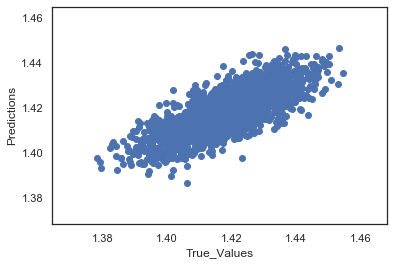

In [77]:
X_train, X_test, y_train, y_test = train_test_split(train1, y, test_size=0.2,random_state=42)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)
print(predictions)

plt.scatter(y_test, predictions)
plt.xlabel('True_Values')
plt.ylabel('Predictions')
model.score(X_test, y_test)
print(f'Coefficients: {lm.coef_}')
print(f'Intercept: {lm.intercept_}')
print(f'R^2 score: {lm.score(X_test, y_test)}')

import statsmodels.api as sm

X_constant = sm.add_constant(X_train)
lin_reg = sm.OLS(y_train,X_constant).fit()
lin_reg.summary()

,tpl_flag,d0_connection,d1_connection,d0_phin,dh_spillage_o2d,service_profile_FBF,shared_lanes_flag_shared,service_profile_nfbf_tier_NON_FBFEXPRESS,lockin_flag_active,lpe_tier_ECONOMY,lpe_tier_EXPRESS,lpe_tier_PREMIUM,air_flag_Air,L,Z
vif,1.725725,3.375056,1.909059,1.613298,1.011353,4.586307,1.705271,2.722821,1.028461,1.32826,1.040522,1.133248,1.12939,1.466741,1.394355


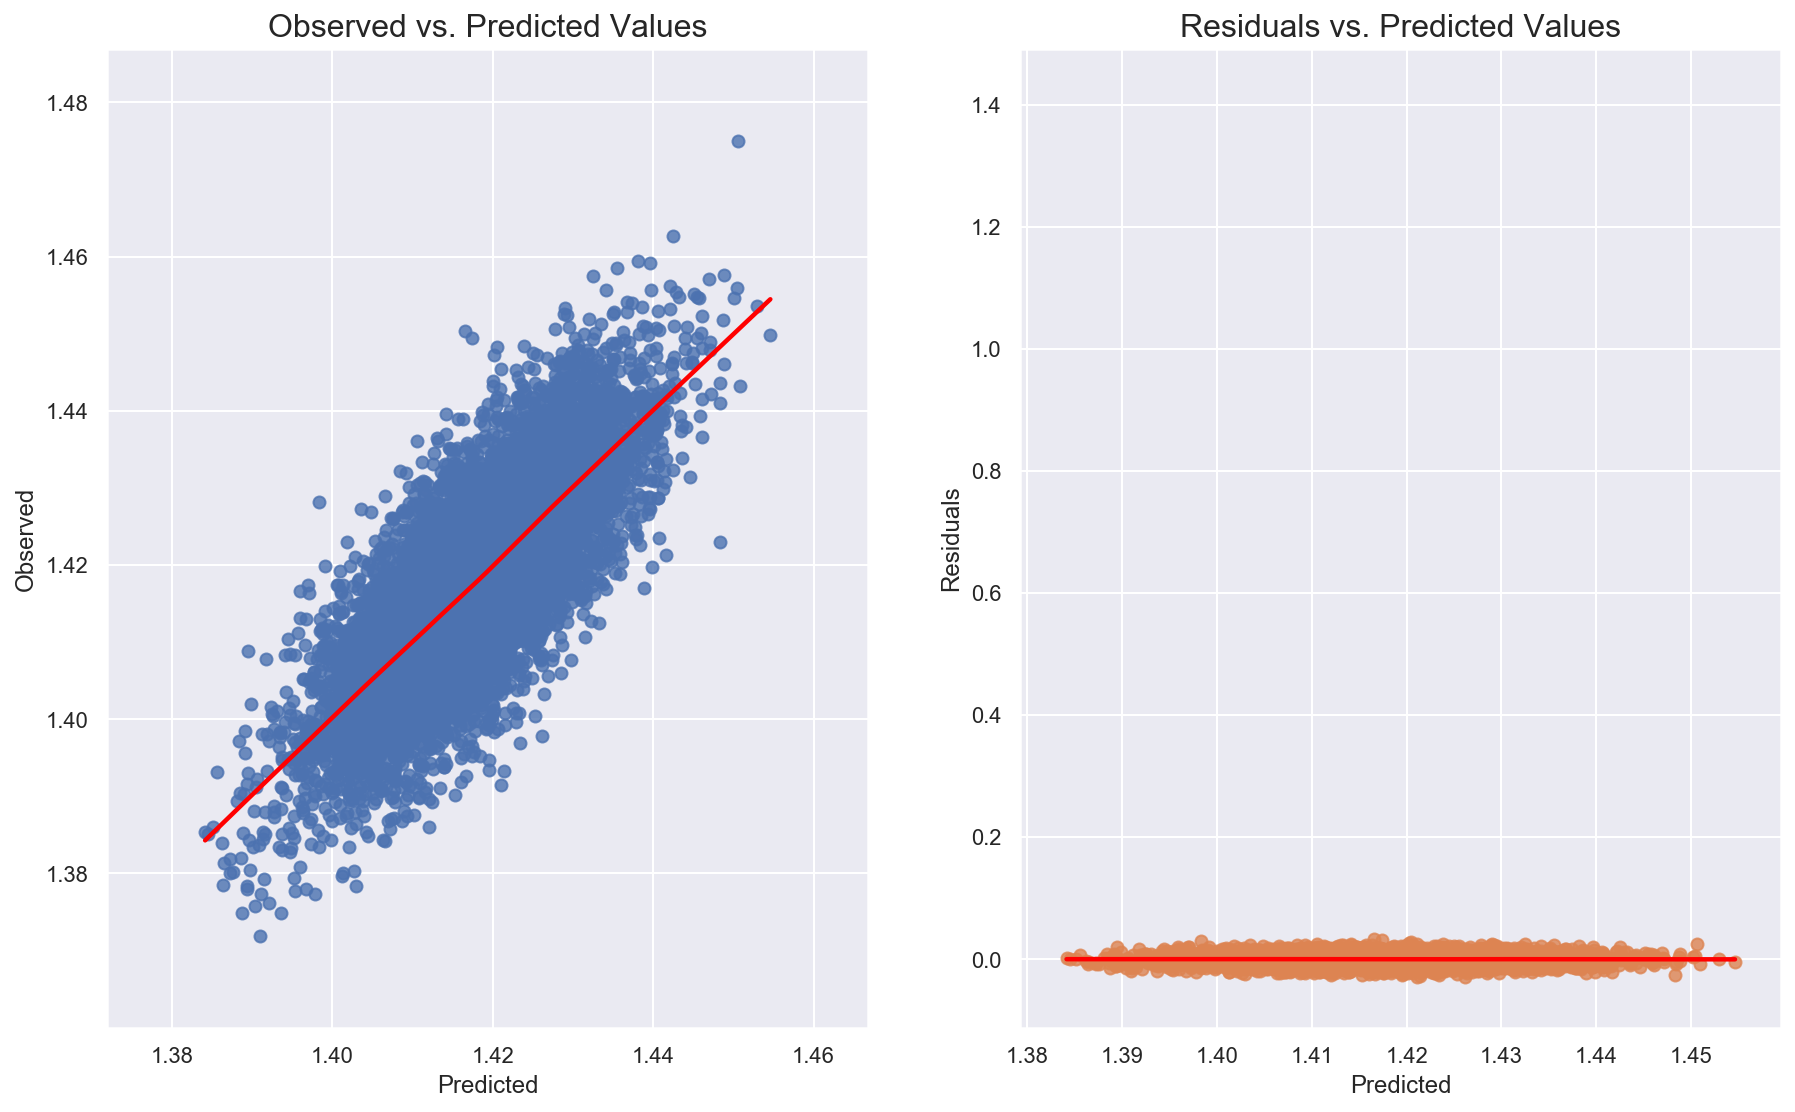

In [78]:

%matplotlib inline
%config InlineBackend.figure_format ='retina'
import seaborn as sns 
import matplotlib.pyplot as plt
import statsmodels.stats.api as sms
sns.set_style('darkgrid')
sns.mpl.rcParams['figure.figsize'] = (15.0, 9.0)

def linearity_test(model, y):
    '''
    Function for visually inspecting the assumption of linearity in a linear regression model.
    It plots observed vs. predicted values and residuals vs. predicted values.
    
    Args:
    * model - fitted OLS model from statsmodels
    * y - observed values
    '''
    fitted_vals = model.predict()
    resids = model.resid

    fig, ax = plt.subplots(1,2)
    
    sns.regplot(x=fitted_vals, y=y, lowess=True, ax=ax[0], line_kws={'color': 'red'})
    ax[0].set_title('Observed vs. Predicted Values', fontsize=16)
    ax[0].set(xlabel='Predicted', ylabel='Observed')

    sns.regplot(x=fitted_vals, y=resids, lowess=True, ax=ax[1], line_kws={'color': 'red'})
    ax[1].set_title('Residuals vs. Predicted Values', fontsize=16)
    ax[1].set(xlabel='Predicted', ylabel='Residuals')
    
linearity_test(lin_reg, y_train)
lin_reg.resid.mean()


from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = [variance_inflation_factor(X_constant.values, i) for i in range(X_constant.shape[1])]
pd.DataFrame({'vif': vif[1:]}, index=X_train.columns).T


4.031446177429966e-15

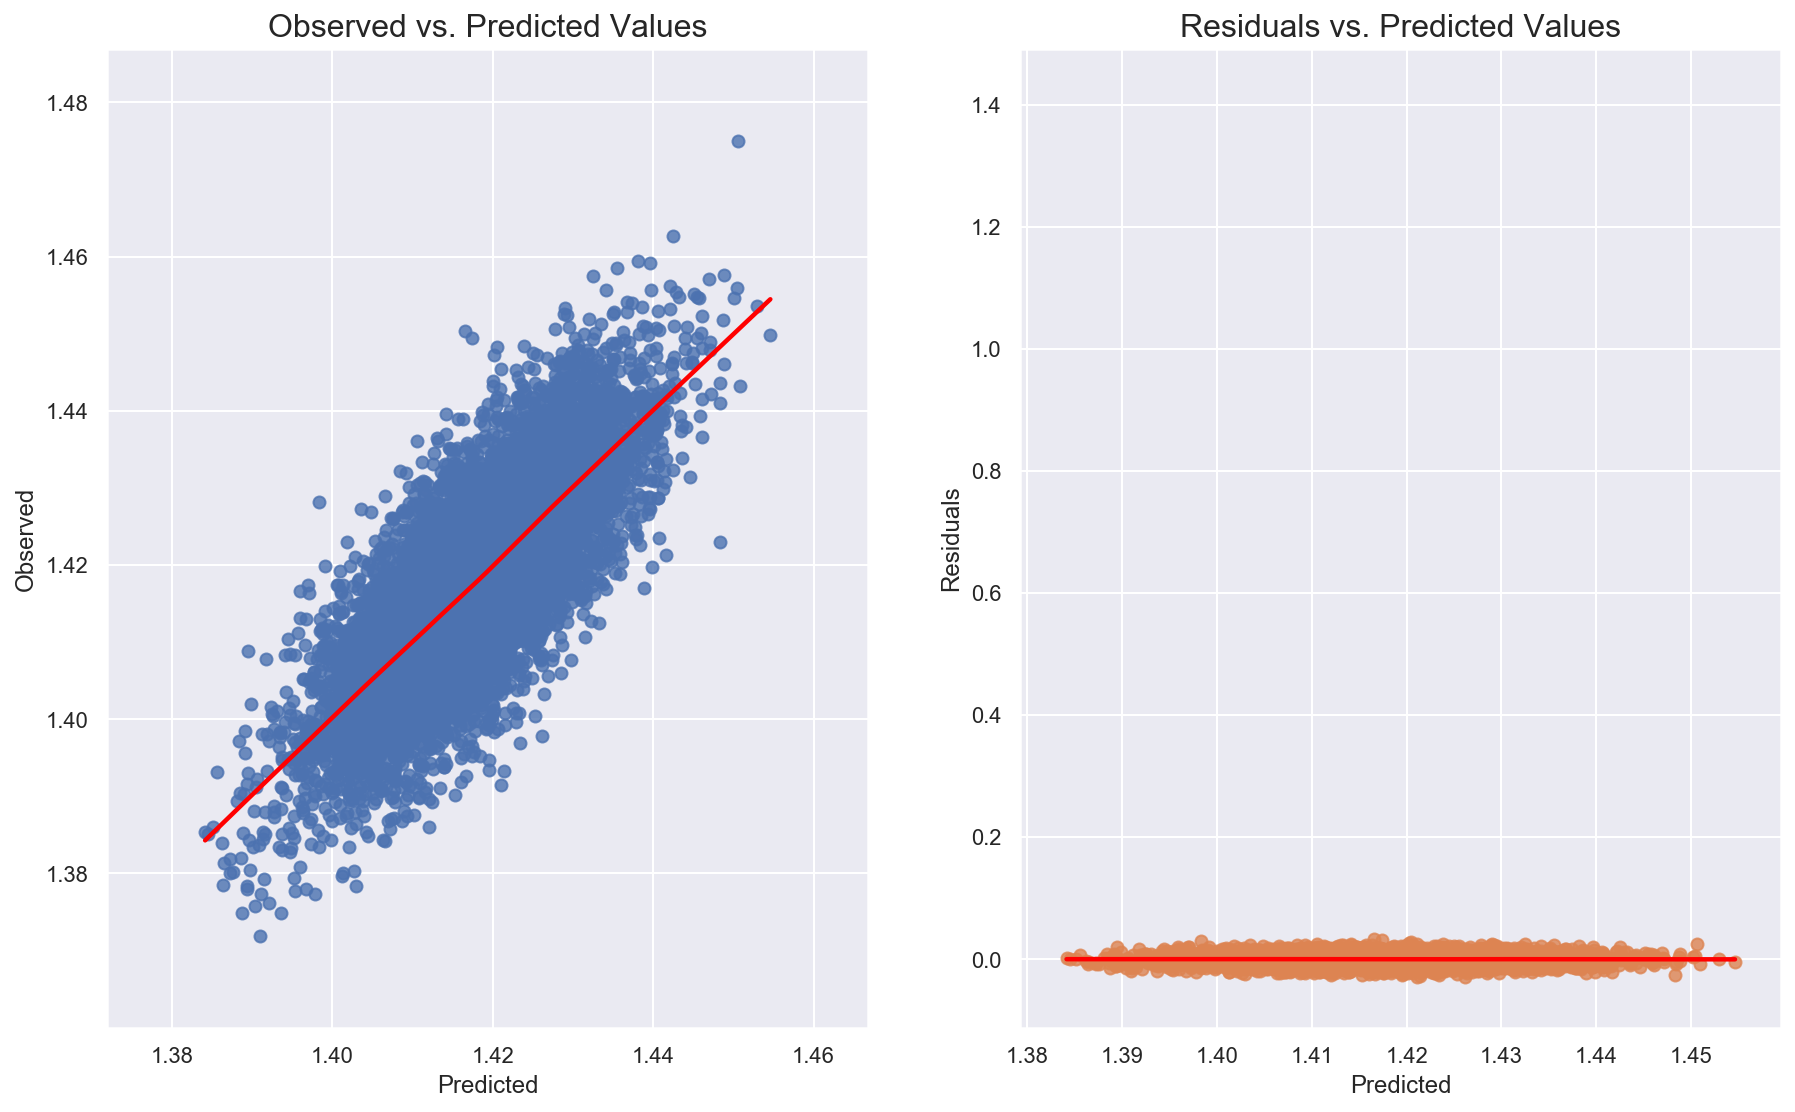

In [79]:
linearity_test(lin_reg, y_train)
lin_reg.resid.mean()


 Breusch-Pagan test ----
                                   value
Lagrange multiplier statistic  18.741310
p-value                         0.225697
f-value                         1.249850
f p-value                       0.225711

 Goldfeld-Quandt test ----
                value
F statistic  1.001726
p-value      0.478305

 Residuals plots ----
Variable: tpl_flag --- correlation: 0.0000, p-value: 1.0000
Variable: d0_connection --- correlation: -0.0000, p-value: 1.0000
Variable: d1_connection --- correlation: 0.0000, p-value: 1.0000
Variable: d0_phin --- correlation: 0.0000, p-value: 1.0000
Variable: dh_spillage_o2d --- correlation: 0.0000, p-value: 1.0000
Variable: service_profile_FBF --- correlation: -0.0000, p-value: 1.0000
Variable: shared_lanes_flag_shared --- correlation: -0.0000, p-value: 1.0000
Variable: service_profile_nfbf_tier_NON_FBFEXPRESS --- correlation: 0.0000, p-value: 1.0000
Variable: lockin_flag_active --- correlation: 0.0000, p-value: 1.0000
Variable: lpe_tier_ECONO

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:52: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


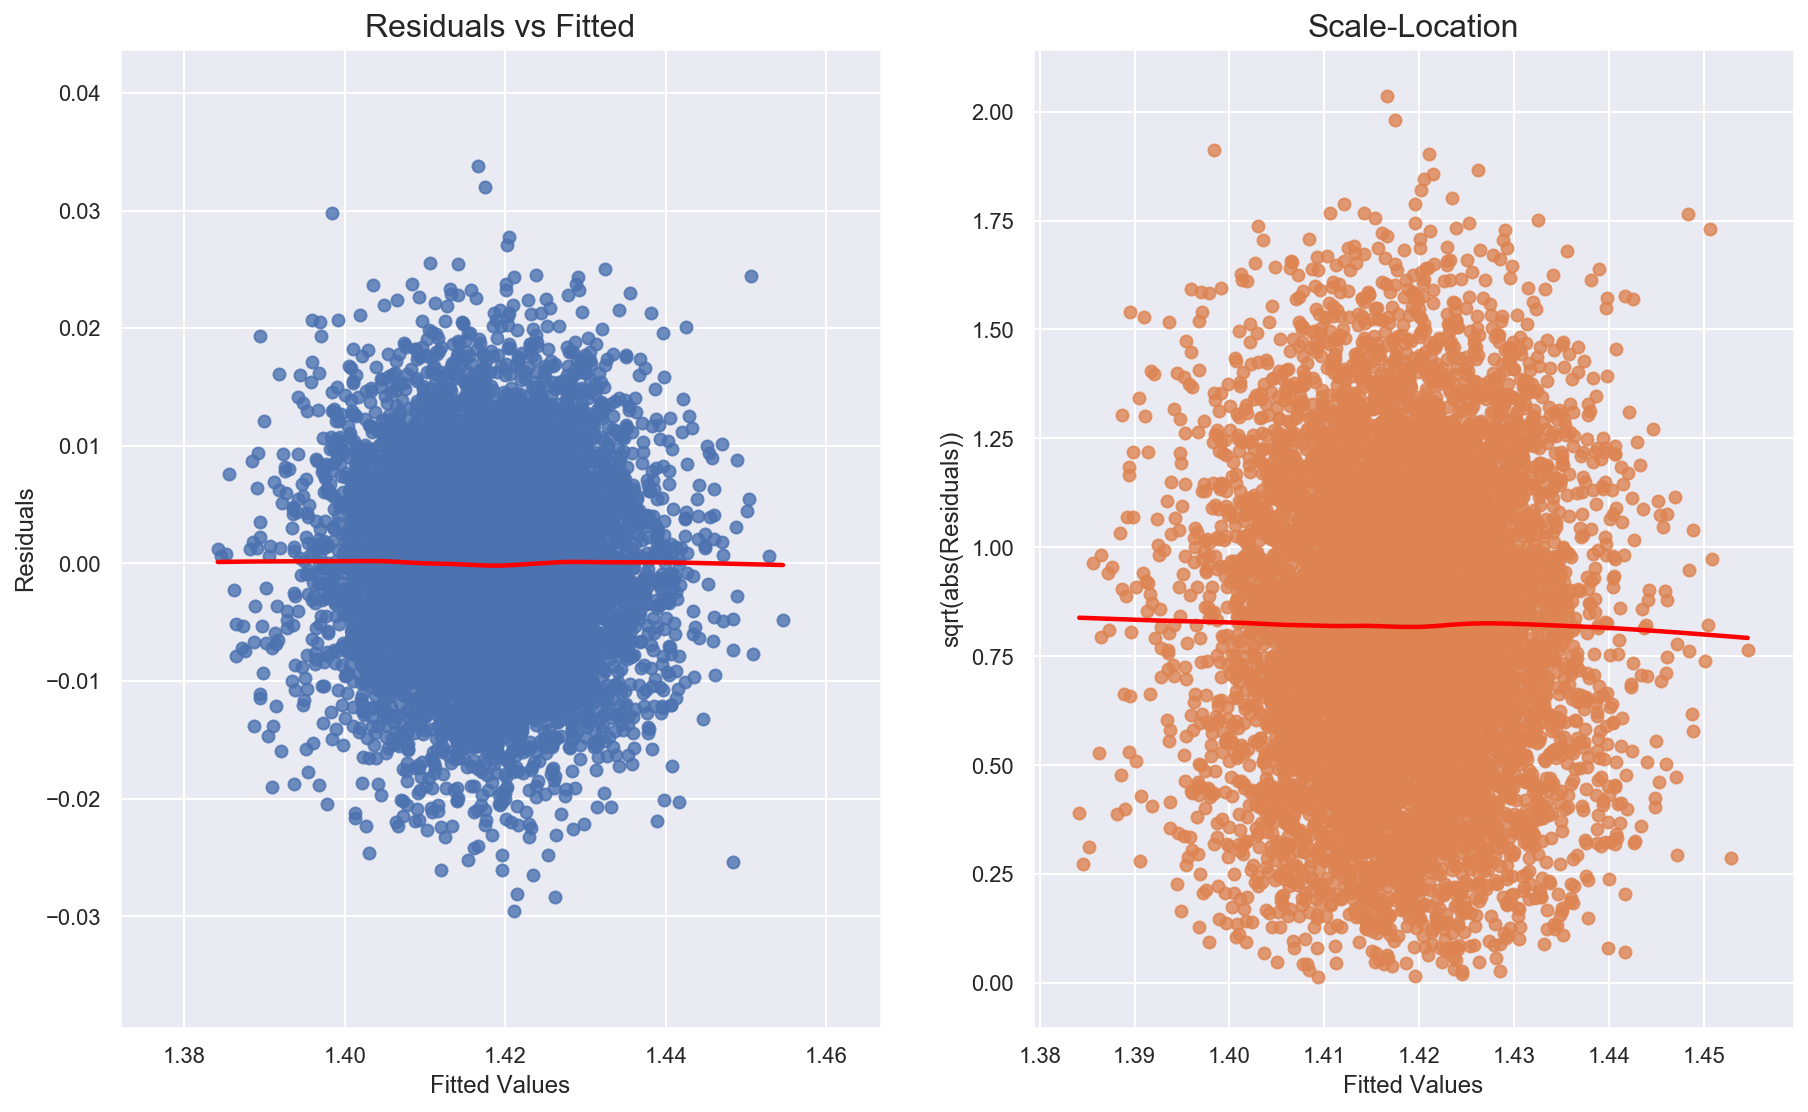

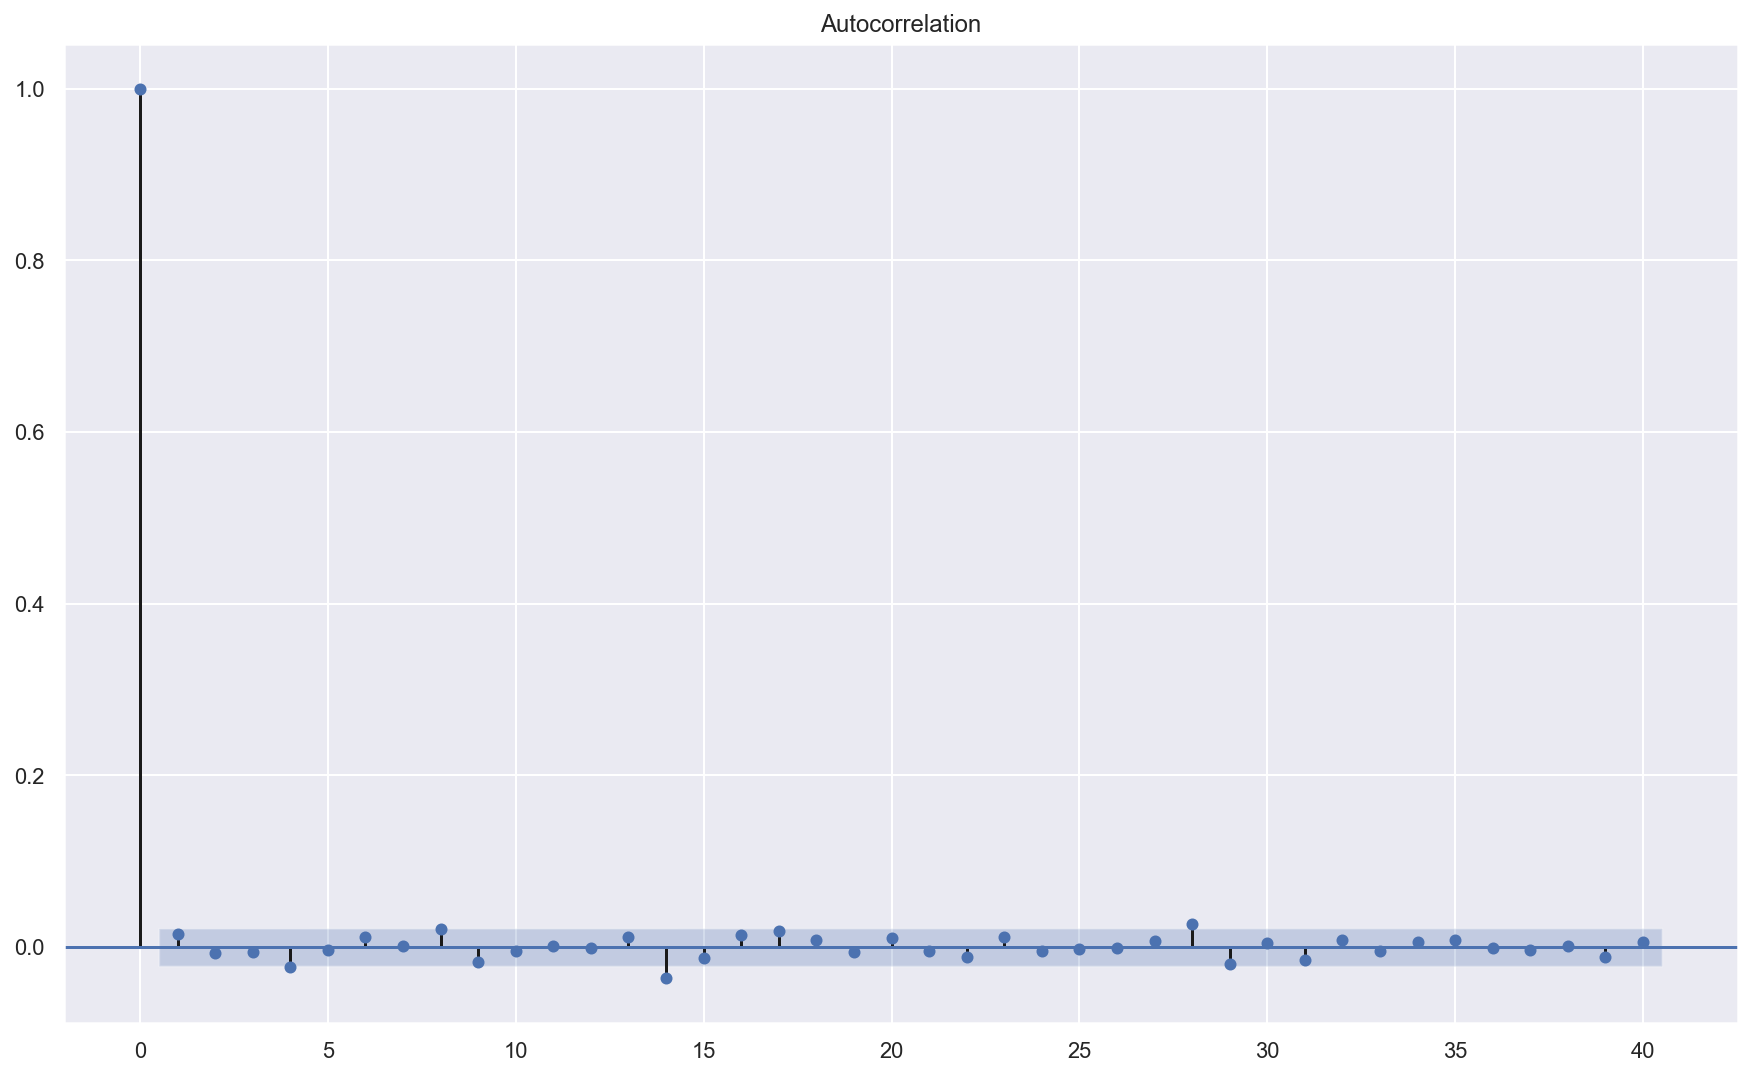

In [80]:

%matplotlib inline
%config InlineBackend.figure_format ='retina'
import seaborn as sns 
import matplotlib.pyplot as plt
import statsmodels.stats.api as sms
sns.set_style('darkgrid')
sns.mpl.rcParams['figure.figsize'] = (15.0, 9.0)

def homoscedasticity_test(model):
    '''
    Function for testing the homoscedasticity of residuals in a linear regression model.
    It plots residuals and standardized residuals vs. fitted values and runs Breusch-Pagan and Goldfeld-Quandt tests.
    
    Args:
    * model - fitted OLS model from statsmodels
    '''
    fitted_vals = model.predict()
    resids = model.resid
    resids_standardized = model.get_influence().resid_studentized_internal

    fig, ax = plt.subplots(1,2)

    sns.regplot(x=fitted_vals, y=resids, lowess=True, ax=ax[0], line_kws={'color': 'red'})
    ax[0].set_title('Residuals vs Fitted', fontsize=16)
    ax[0].set(xlabel='Fitted Values', ylabel='Residuals')

    sns.regplot(x=fitted_vals, y=np.sqrt(np.abs(resids_standardized)), lowess=True, ax=ax[1], line_kws={'color': 'red'})
    ax[1].set_title('Scale-Location', fontsize=16)
    ax[1].set(xlabel='Fitted Values', ylabel='sqrt(abs(Residuals))')

    bp_test = pd.DataFrame(sms.het_breuschpagan(resids, model.model.exog), 
                           columns=['value'],
                           index=['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value'])

    gq_test = pd.DataFrame(sms.het_goldfeldquandt(resids, model.model.exog)[:-1],
                           columns=['value'],
                           index=['F statistic', 'p-value'])

    print('\n Breusch-Pagan test ----')
    print(bp_test)
    print('\n Goldfeld-Quandt test ----')
    print(gq_test)
    print('\n Residuals plots ----')

homoscedasticity_test(lin_reg)

'''---------------------------testing autocorrelation -------------------'''

import statsmodels.tsa.api as smt

acf = smt.graphics.plot_acf(lin_reg.resid, lags=40 , alpha=0.05)
acf.show()

'''----------------------------testing pearson correlation -------------------'''

from scipy.stats.stats import pearsonr

for column in X_train.columns:
    corr_test = pearsonr(X_train[column], lin_reg.resid)
    print(f'Variable: {column} --- correlation: {corr_test[0]:.4f}, p-value: {corr_test[1]:.4f}')

